# Demo 2: Autoregressive Moving Average (ARMA) model
In this demo, we are continuing with data car stock.

# Task 1: Read data

In [1]:
import pandas as pd

In [2]:
# Read csv data:
file_path = "/Users/user/AI_Class/Supervised/Regression/data_car_stock/BMW.DE.csv"
df_BMW = pd.read_csv(file_path) # read csv file to dataframe in pandas package

# Task 2: Autoregressive Moving Average (ARMA) model for close time series data.

## Task 2.1: Check for autocorrelation
As same as demo 1

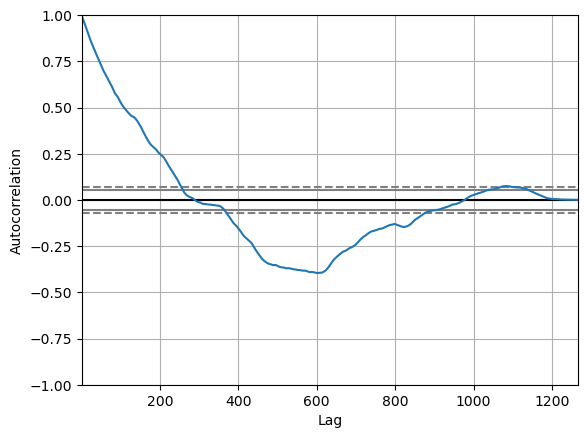

In [3]:
from matplotlib import pyplot as plt
# Plot auto correlation depends on lag
auto_corr_Close = pd.plotting.autocorrelation_plot(df_BMW["Close"])
auto_corr_Close.plot()
plt.show()

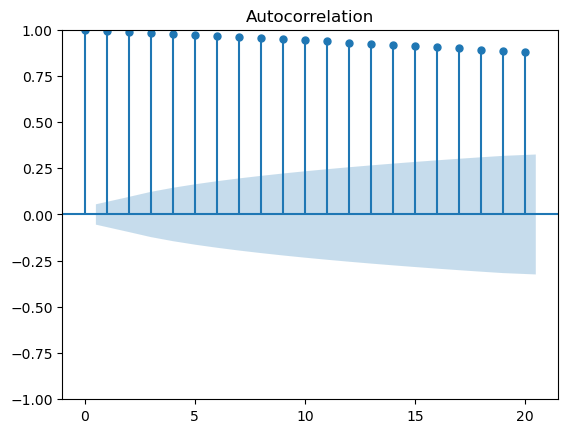

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_BMW["Close"],lags=20,alpha = 0.05) 
# Default alpha is 0.05, plots the 95% confidence intervals.
plt.show()

## Task 2.2: Create an Autoregressive Moving Average model

Autoregressive Integrated Moving Average (ARIMA) model, and extensions

This model is the basic interface for ARIMA-type models, including those with exogenous regressors and those with seasonal components. The most general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows all specialized cases, including

-   autoregressive models: AR(p)

-   moving average models: MA(q)

-   mixed autoregressive moving average models: ARMA(p, q)

-   integration models: ARIMA(p, d, q)

-   seasonal models: SARIMA(P, D, Q, s)

-   regression with errors that follow one of the above ARIMA-type models

[https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html](Documents of statsmodels.tsa.arima.model.ARIMA)

In [5]:
# import package
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
# Prepare data for model
y_train = df_BMW["Close"][:1000]
y_test = df_BMW["Close"][1000:]
print(len(y_test))

266


In [7]:
# Create an autoregressive moving average model
p,d,q = (2,0,2)
temp_arma = ARIMA(y_train,order=(p,d,q))
trained_arma = temp_arma.fit()

In [8]:
# Obtain value of parameters after training/fitting
print("Coefficients:", trained_arma.params)

Coefficients: const     73.239063
ar.L1      1.387316
ar.L2     -0.390465
ma.L1     -0.338936
ma.L2      0.035043
sigma2     1.166061
dtype: float64


## Notice:

Take a look at slide of Auto-Regressive Moving Average of lecture ppt:
-   Consider the function form of ARMA:
    -   In previous demo of code we are using p = 2, q = 2 (d=0, without intergrated)
    -   After fitting model we obtain trained model with Autoregressive parameters (ar.L1 and ar.L2 denoted as $\phi _i $ in the slide) and (Moving average parameters denoted as $\theta _j$ in the slide)$$

In [9]:
# Use trained/fitted model to predict close value on last 266 times (test times)
y_pred = trained_arma.predict(start=len(y_train),
                               end=len(y_train) + len(y_test) - 1,
                               dynamic=False)


In [10]:
print(f"Predict Close value at time = {df_BMW['Date'][1000]} is:{y_pred[1000]}, true Close value is: {df_BMW['Close'][1000]}")

Predict Close value at time = 2020-08-03 is:54.56968011740378, true Close value is: 56.209999


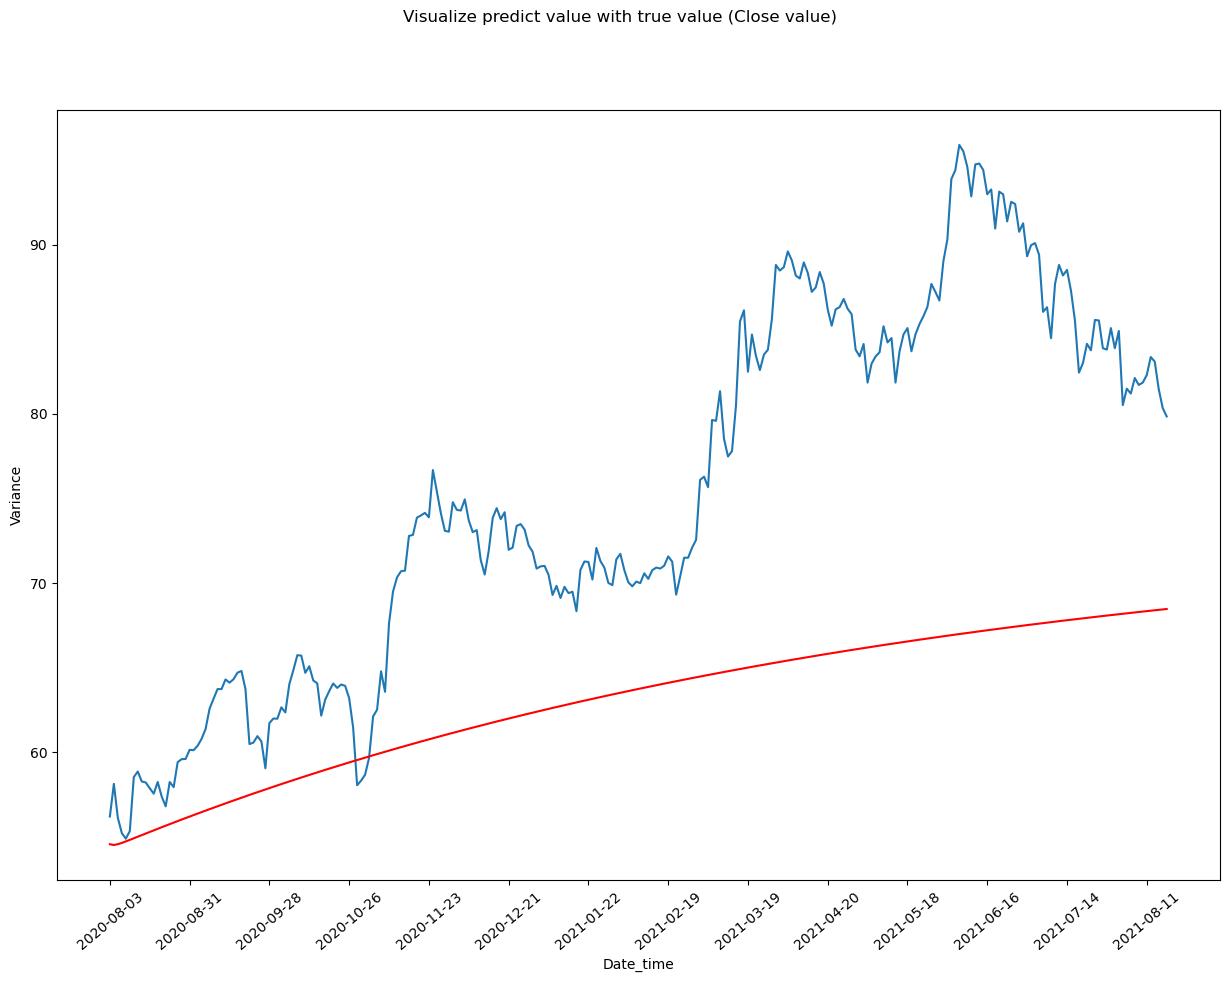

In [11]:
# Visualize predict value with true value
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(df_BMW["Date"][1000:],y_test)
ax.plot(df_BMW["Date"][1000:],y_pred,color = 'red')
fig.suptitle("Visualize predict value with true value (Close value)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Variance")
ax.set_xticks(ax.get_xticks()[::20])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')
plt.show()

In [12]:
# Mean squared error:
from math import sqrt
print("Square root of MSE on test dataset:",sqrt(mean_squared_error(y_pred=y_pred.to_numpy(),y_true=y_test.to_numpy())))

Square root of MSE on test dataset: 14.379513819141863


In [13]:
## One more template model with p = 13, q = 9
# Create an autoregressive moving average model
p,d,q = (13,0,9)
temp_ar13ma9 = ARIMA(y_train,order=(p,d,q))
trained_ar13ma9 = temp_ar13ma9.fit()

/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Obtain value of parameters after training/fitting
# print("Coefficients:", trained_ar30ma10.params)

In [15]:
print(trained_ar13ma9.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1000
Model:                ARIMA(13, 0, 9)   Log Likelihood               -1487.783
Date:                Tue, 31 Oct 2023   AIC                           3023.567
Time:                        15:33:47   BIC                           3141.353
Sample:                             0   HQIC                          3068.333
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.7980      8.564      8.851      0.000      59.013      92.583
ar.L1         -0.3038      3.662     -0.083      0.934      -7.481       6.874
ar.L2         -0.1893      3.321     -0.057      0.9

In [16]:
# Use trained/fitted model to predict close value on last 266 times (test times)
y_pred13_9 = trained_ar13ma9.predict(start=len(y_train),
                               end=len(y_train) + len(y_test) - 1,
                               dynamic=False)

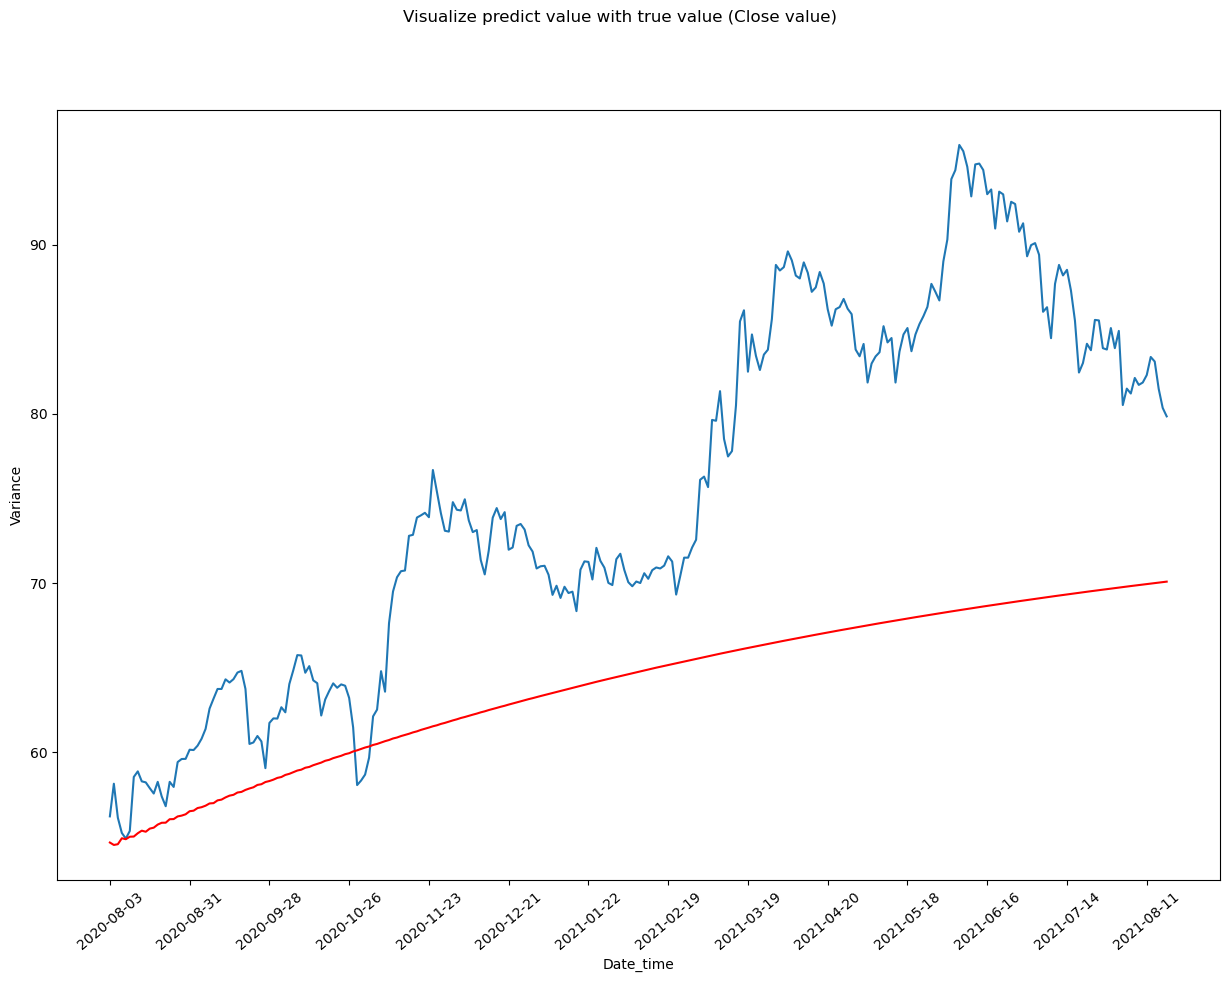

In [17]:
# Visualize predict value with true value
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(df_BMW["Date"][1000:],y_test)
ax.plot(df_BMW["Date"][1000:],y_pred13_9,color = 'red')
fig.suptitle("Visualize predict value with true value (Close value)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Variance")
ax.set_xticks(ax.get_xticks()[::20])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')
plt.show()

In [18]:
# Mean squared error:
from math import sqrt
print("Square root of MSE on test dataset:",sqrt(mean_squared_error(y_pred=y_pred13_9.to_numpy(),y_true=y_test.to_numpy())))

Square root of MSE on test dataset: 13.384400914378684


## Task 2.3: Auto-Regressive Integrated Moving Average model

In [19]:
p,d,q = (5,2,3)
temp_arima = ARIMA(y_train,order=(p,d,q))
trained_arima = temp_arima.fit()

In [20]:
# Obtain value of parameters after training/fitting
print("Coefficients:", trained_arima.params)

Coefficients: ar.L1    -1.531748
ar.L2    -0.765726
ar.L3     0.157462
ar.L4     0.100045
ar.L5     0.061815
ma.L1     0.596311
ma.L2    -0.694368
ma.L3    -0.900594
sigma2    1.152207
dtype: float64


In [21]:
print(trained_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1000
Model:                 ARIMA(5, 2, 3)   Log Likelihood               -1490.016
Date:                Tue, 31 Oct 2023   AIC                           2998.032
Time:                        15:33:49   BIC                           3042.184
Sample:                             0   HQIC                          3014.814
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5317      0.055    -28.049      0.000      -1.639      -1.425
ar.L2         -0.7657      0.068    -11.299      0.000      -0.899      -0.633
ar.L3          0.1575      0.060      2.645      0.0

In [22]:
# Use trained/fitted model to predict close value on last 266 times (test times)
y_pred_arima = trained_arima.predict(start=len(y_train),
                               end=len(y_train) + len(y_test) - 1,
                               dynamic=False)

In [37]:
df_BMW.index

DatetimeIndex(['2016-08-19', '2016-08-22', '2016-08-23', '2016-08-24',
               '2016-08-25', '2016-08-26', '2016-08-29', '2016-08-30',
               '2016-08-31', '2016-09-01',
               ...
               '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16',
               '2021-08-17', '2021-08-18'],
              dtype='datetime64[ns]', name='Date', length=1266, freq=None)

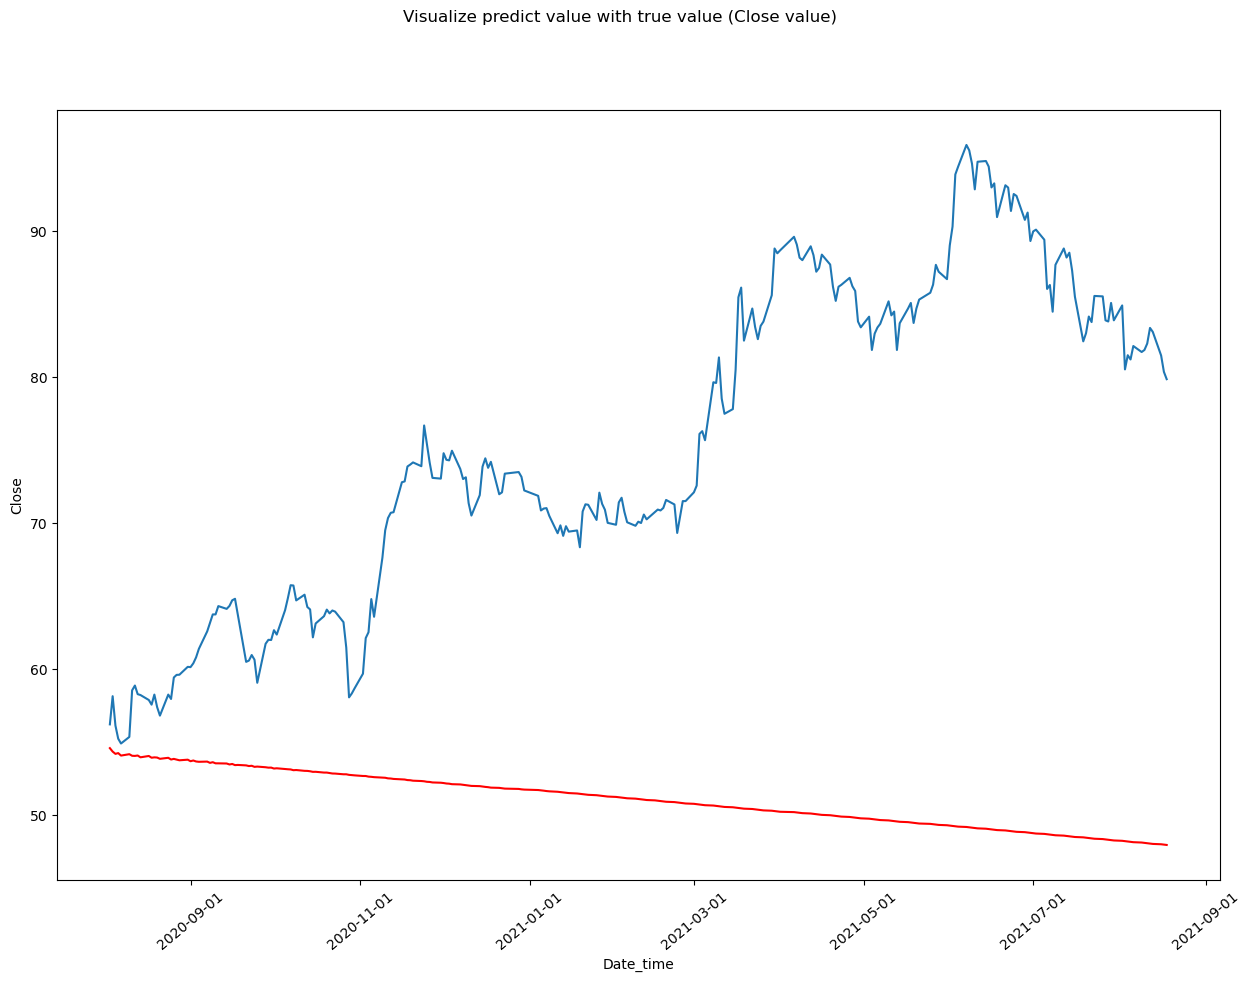

In [40]:
# Visualize predict value with true value
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(df_BMW.index[1000:],y_test)
ax.plot(df_BMW.index[1000:],y_pred_arima,color = 'red')
fig.suptitle("Visualize predict value with true value (Close value)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Close")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')
plt.show()

In [24]:
# Mean squared error:
print("Square root of MSE on test dataset:",sqrt(mean_squared_error(y_pred=y_pred_arima.to_numpy(),y_true=y_test.to_numpy())))

Square root of MSE on test dataset: 27.27483255450277


### Task 3: Using the adf test to choose the order p,d,q
-   Take a look at Demo_0 we choose two model to visualize evaluation of peredict (forecat)

In [28]:
# Model ARIMA(57,1,57)
df_BMW["Date"] = pd.to_datetime(df_BMW["Date"])
df_BMW = df_BMW.set_index("Date")

In [30]:
model_1 = ARIMA(df_BMW['Close'],order = (57,1,57))
model_1_fit = model_1.fit()
# model_1_fit.summary()

/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1266
Model:               ARIMA(57, 1, 57)   Log Likelihood               -1901.253
Date:                Tue, 31 Oct 2023   AIC                           4032.507
Time:                        15:47:17   BIC                           4623.932
Sample:                             0   HQIC                          4254.712
                               - 1266                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|        [0.0        1.0]
------------------------------------------------------------------------------
ar.L1          0.1211      1.110      0.109      0.913        -inf         inf
ar.L2          0.1142      0.836      0.137      0.891        -inf         inf
ar.L3         -0.2127      0.613     -0.347      0.729        -inf         inf
ar.L4         -0.0036      0.599     -0.006      0.995        -inf         inf
ar.L5          0.0370      0.598      0.062      0.951        -inf         inf
ar.L6          0.0678      0.575      0.118      0.906        -inf         inf
ar.L7          0.1032      0.452      0.228      0.819        -inf         inf
ar.L8         -0.0090      0.324     -0.028      0.978        -inf         inf
ar.L9          0.2056      0.316      0.650      0.516        -inf         inf
ar.L10        -0.0294      0.398     -0.074      0.941        -inf         inf
ar.L11        -0.0054      0.336     -0.016      0.987        -inf         inf
ar.L12         0.0674      0.329      0.205      0.838        -inf         inf
ar.L13        -0.1212      0.326     -0.372      0.710        -inf         inf
ar.L14         0.0425      0.403      0.106      0.916        -inf         inf
ar.L15        -0.1387      0.334     -0.415      0.678        -inf         inf
ar.L16        -0.0500      0.331     -0.151      0.880        -inf         inf
ar.L17         0.0795      0.262      0.303      0.762        -inf         inf
ar.L18        -0.0373      0.280     -0.133      0.894        -inf         inf
ar.L19        -0.1676      0.291     -0.577      0.564        -inf         inf
ar.L20         0.0033      0.246      0.013      0.989        -inf         inf
ar.L21         0.1038      0.231      0.450      0.653        -inf         inf
ar.L22         0.1037      0.245      0.423      0.672        -inf         inf
ar.L23        -0.2497      0.267     -0.935      0.350        -inf         inf
ar.L24        -0.0382      0.347     -0.110      0.912        -inf         inf
ar.L25         0.2023      0.265      0.765      0.444        -inf         inf
ar.L26         0.1118      0.324      0.345      0.730        -inf         inf
ar.L27        -0.0463      0.282     -0.164      0.870        -inf         inf
ar.L28         0.1339      0.252      0.532      0.595        -inf         inf
ar.L29         0.0663      0.273      0.243      0.808        -inf         inf
ar.L30        -0.0343      0.236     -0.146      0.884        -inf         inf
ar.L31         0.0365      0.236      0.155      0.877        -inf         inf
ar.L32         0.0302      0.225      0.134      0.893        -inf         inf
ar.L33         0.0659      0.216      0.304      0.761        -inf         inf
ar.L34        -0.1172      0.211     -0.556      0.578        -inf         inf
ar.L35        -0.1353      0.225     -0.601      0.548        -inf         inf
ar.L36         0.0494      0.252      0.196      0.844        -inf         inf
ar.L37        -0.0944      0.238     -0.397      0.691        -inf         inf
ar.L38        -0.1179      0.294     -0.401      0.689        -inf         inf
ar

In [34]:
# Use trained/fitted model to predict close value on last 266 times (test times)
y_pred_model1 = model_1_fit.predict(start=len(y_train),
                               end=len(y_train) + len(y_test) - 1,
                               dynamic=False)

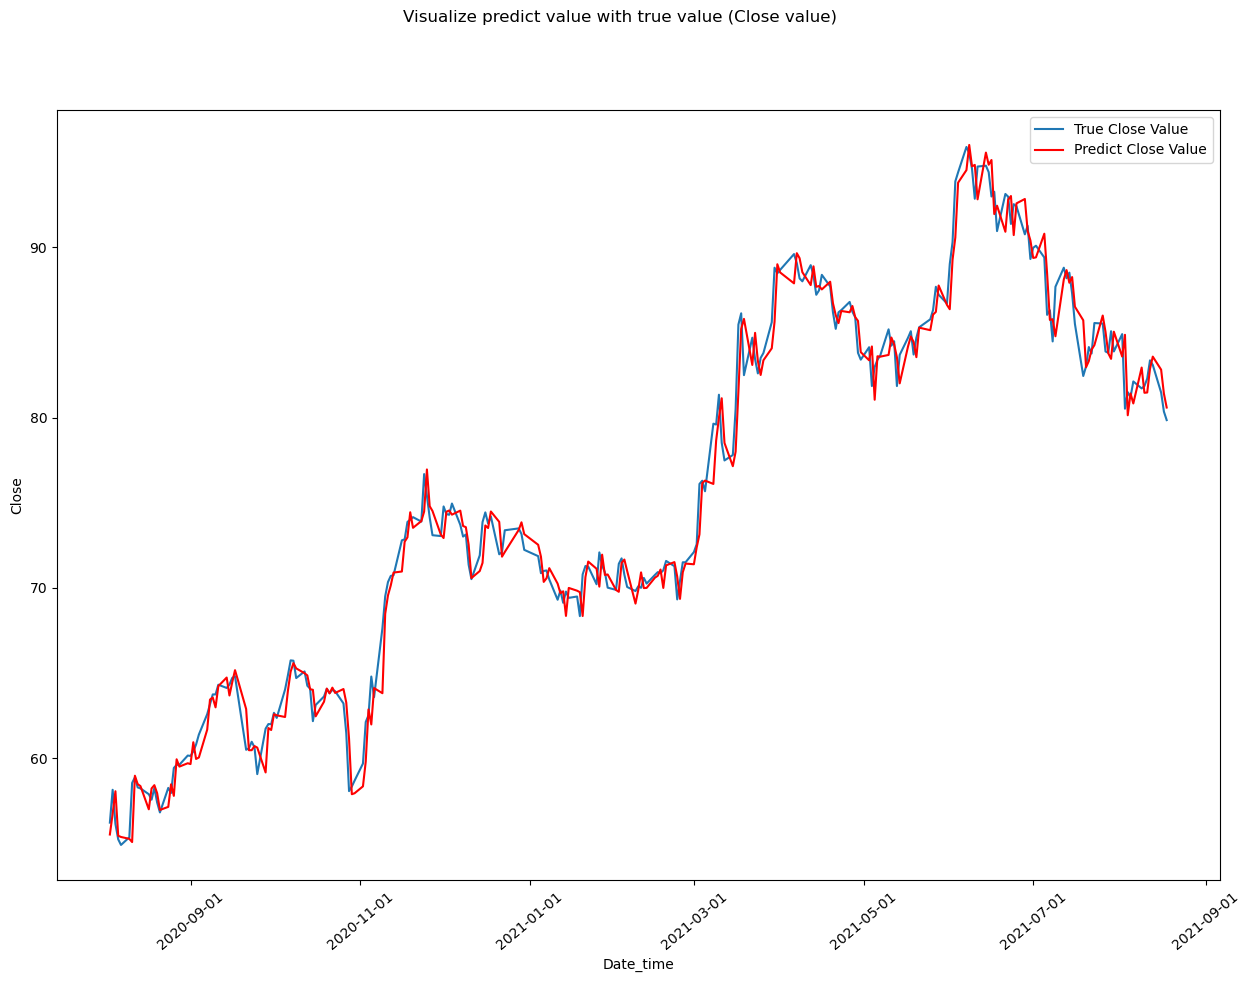

In [45]:
# Visualize predict value with true value
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(df_BMW.index[1000:],y_test,label = 'True Close Value')
ax.plot(df_BMW.index[1000:],y_pred_model1,color = 'red', label = "Predict Close Value")
fig.suptitle("Visualize predict value with true value (Close value)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Close")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')
ax.legend()
plt.show()

In [43]:
# Mean squared error:
print("Square root of MSE on test dataset:",sqrt(mean_squared_error(y_pred=y_pred_model1.to_numpy(),y_true=y_test.to_numpy())))

Square root of MSE on test dataset: 1.251429043687096


In [46]:
model_2 = ARIMA(df_BMW['Close'],order = (1,2,1))
model_2_fit = model_2.fit()
model_2_fit.summary()

/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1266
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1962.599
Date:                Tue, 31 Oct 2023   AIC                           3931.198
Time:                        16:07:08   BIC                           3946.624
Sample:                             0   HQIC                          3936.994
                               - 1266                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0414      0.027      1.559      0.119      -0.011       0.094
ma.L1         -0.9998      0.020    -49.992      0.000      -1.039      -0.961
sigma2         1.2996      0.037     34.807      0.000       1.226       1.373
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               733.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# Use trained/fitted model to predict close value on last 266 times (test times)
y_pred_model2 = model_2_fit.predict(start=len(y_train),
                               end=len(y_train) + len(y_test) - 1,
                               dynamic=False)

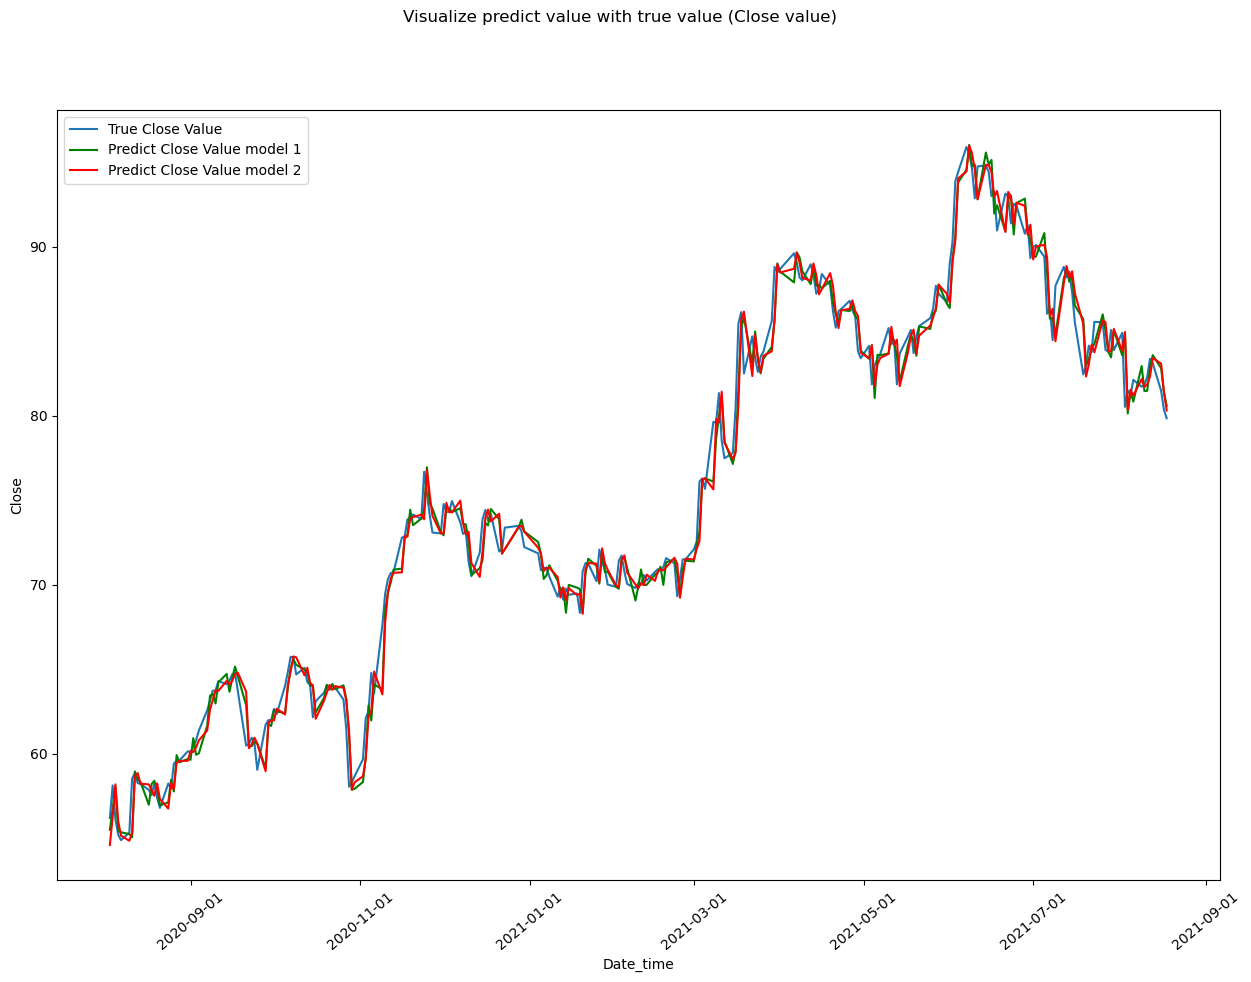

In [48]:
# Visualize predict value with true value
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(df_BMW.index[1000:],y_test,label = 'True Close Value')
ax.plot(df_BMW.index[1000:],y_pred_model1,color = 'green', label = "Predict Close Value model 1")

ax.plot(df_BMW.index[1000:],y_pred_model2,color = 'red', label = "Predict Close Value model 2")

fig.suptitle("Visualize predict value with true value (Close value)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Close")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')
ax.legend()
plt.show()

In [49]:
# Mean squared error:
print("Square root of MSE on test dataset:",sqrt(mean_squared_error(y_pred=y_pred_model2.to_numpy(),y_true=y_test.to_numpy())))

Square root of MSE on test dataset: 1.3325168991726601


In [52]:
df_BMW.index[1000]

Timestamp('2020-08-03 00:00:00')

In [65]:
train_data,test_data = df_BMW[:1000],df_BMW[1000:]
train_arima = train_data['Close']
test_arima = test_data['Close']

In [68]:
test_arima

Date
2020-08-03    56.209999
2020-08-04    58.139999
2020-08-05    56.130001
2020-08-06    55.230000
2020-08-07    54.900002
                ...    
2021-08-12    83.360001
2021-08-13    83.089996
2021-08-16    81.470001
2021-08-17    80.349998
2021-08-18    79.849998
Name: Close, Length: 266, dtype: float64

In [71]:
history = [x for x in train_arima]
y = test_arima
predictions = []
model = ARIMA(history, order=(1,2,1))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/pr/m0clhjz90k976cml329f7j740000gn/T/ipykernel_63074/2942003314.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [72]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/pr/m0clhjz90k976cml329f7j740000gn/T/ipykernel_63074/3486448204.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
# report performance
mse = mean_squared_error(np.array(y), np.array(predictions))
print('MSE: '+str(mse))
mae = mean_absolute_error(np.array(y),np.array( predictions))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(np.array(y), np.array(predictions)))
print('RMSE: '+str(rmse))

MSE: 1.7803928592868499
MAE: 0.9752637150412387
RMSE: 1.3343136285322315


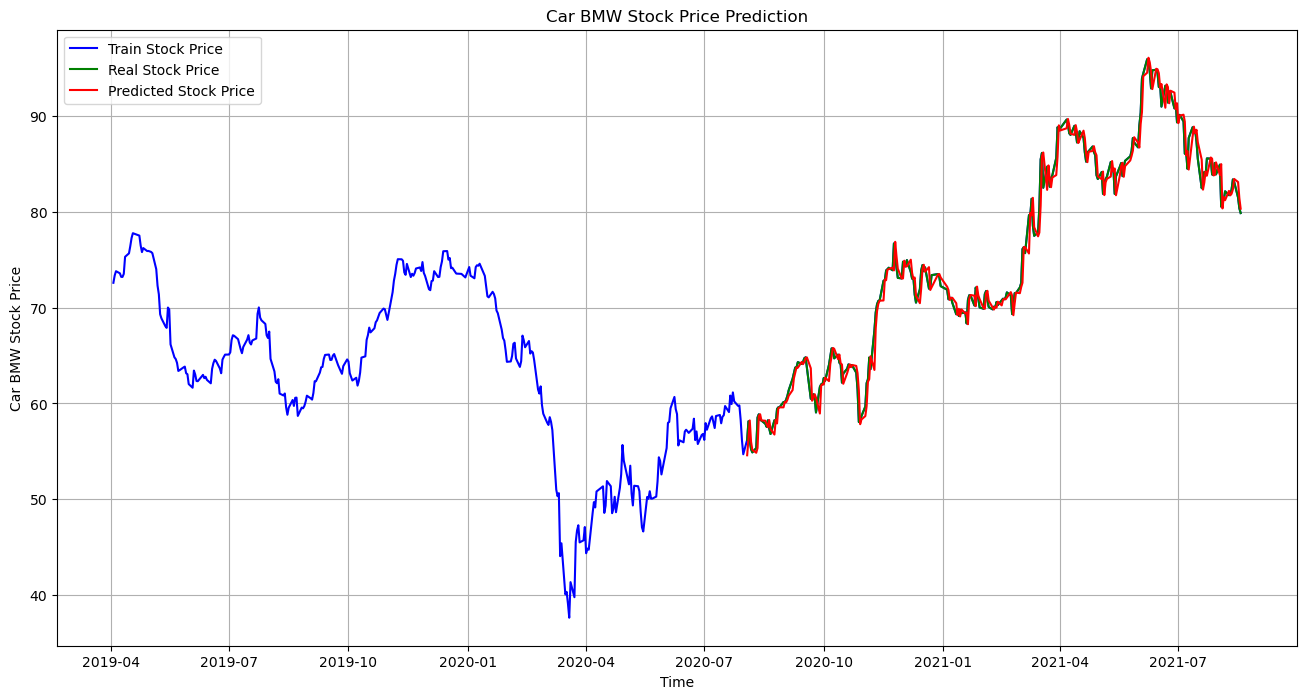

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_BMW.index[-600:], df_BMW['Close'].tail(600), color='blue', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'green', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'red', label = 'Predicted Stock Price')
plt.title('Car BMW Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Car BMW Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()